# Sonoma County Animal Services
## Exploratory Data Analysis

Initial exploratory data analysis for Sonoma County Animal Services (SCAS) animal data and rough-draft testing of visualizations and graphs.

In [95]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## OVERVIEW

In [46]:
SCAS_data = pd.read_csv("project/resources/Animal_Shelter_Intake_and_Outcome.csv")
SCAS_data.head(15)

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,RAZOR,DOG,BOSTON TERRIER,BLACK/WHITE,Neutered,SMALL,10/29/2009,K22-043412,TRUCK,A396382,...,FIELD,RETURN TO OWNER,FLD_IDTAG,UNKNOWN,HEALTHY,SANTA ROSA,SANTA ROSA,95404.0,"95404(38.43807, -122.71247)",1
1,NaN,OTHER,PIGEON,GRAY/WHITE,Unknown,SMALL,NaN,K23-044095,TRUCK,A416206,...,FIELD,EUTHANIZE,INJ SEVERE,UNKNOWN,HEALTHY,SANTA ROSA,NaN,NaN,NaN,1
2,MAX,DOG,BORDER COLLIE,BLACK/TRICOLOR,Neutered,MED,3/10/2020,K23-044090,DS80,A399488,...,FIELD,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,COUNTY,95472.0,"95472(38.40179, -122.82512)",1
3,NaN,CAT,DOMESTIC LH,GRAY/WHITE,Spayed,SMALL,6/26/2011,K22-043405,VET,A414520,...,FIELD,DISPOSAL,DOA,UNKNOWN,DEAD,COUNTY,SANTA ROSA,95403.0,"95403(38.51311, -122.75502)",1
4,PUDGY,DOG,CHIHUAHUA SH/SCHIPPERKE,TAN,Neutered,MED,7/20/2013,K23-043813,DA27,A415428,...,OVER THE COUNTER,TRANSFER,MUTTVILLE,UNKNOWN,HEALTHY,SANTA ROSA,OUT OF COUNTY,94103.0,"94103(37.77672, -122.40779)",1
5,LEXI,DOG,AUST CATTLE DOG,WHITE/BLACK,Spayed,MED,4/1/2022,K22-041089,DS49,A410937,...,FIELD,RETURN TO OWNER,OVER THE COUNTER_PRVS,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.41483, -122.72707)",1
6,NaN,OTHER,BAT,BLACK,Unknown,SMALL,NaN,K23-044072,EUTH,A416138,...,FIELD,EUTHANIZE,FRA,UNKNOWN,UNTREATABLE,COUNTY,NaN,NaN,NaN,1
7,KENJI,DOG,AKITA,TRICOLOR,Neutered,LARGE,5/2/2022,K22-042314,DQ114,A412962,...,FIELD,RETURN TO OWNER,OVER THE COUNTER_WALKIN,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.41483, -122.72707)",1
8,SONOMA,OTHER,HORSE,BROWN/BLACK,Female,LARGE,NaN,K21-040124,CHANGE,A407842,...,FLD_HOSPTL,TRANSFER,NaN,UNKNOWN,TREATABLE/REHAB,COUNTY,COUNTY,95404.0,"95404(38.43807, -122.71247)",1
9,COCO,DOG,GREAT PYRENEES,WHITE,Spayed,LARGE,2/21/2022,K22-042491,DS66,A413774,...,FLD_LIVSTK,RETURN TO OWNER,OVER THE COUNTER_WEB,UNKNOWN,PENDING,COUNTY,COUNTY,95465.0,"95465(38.4071, -122.94753)",1


In [47]:
del SCAS_data["Impound Number"]
del SCAS_data["Kennel Number"]
SCAS_data.head()

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Animal ID,Intake Date,Outcome Date,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,RAZOR,DOG,BOSTON TERRIER,BLACK/WHITE,Neutered,SMALL,10/29/2009,A396382,12/26/2022,12/26/2022,...,FIELD,RETURN TO OWNER,FLD_IDTAG,UNKNOWN,HEALTHY,SANTA ROSA,SANTA ROSA,95404.0,"95404(38.43807, -122.71247)",1
1,NaN,OTHER,PIGEON,GRAY/WHITE,Unknown,SMALL,NaN,A416206,3/15/2023,3/15/2023,...,FIELD,EUTHANIZE,INJ SEVERE,UNKNOWN,HEALTHY,SANTA ROSA,NaN,NaN,NaN,1
2,MAX,DOG,BORDER COLLIE,BLACK/TRICOLOR,Neutered,MED,3/10/2020,A399488,3/15/2023,3/15/2023,...,FIELD,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,COUNTY,95472.0,"95472(38.40179, -122.82512)",1
3,NaN,CAT,DOMESTIC LH,GRAY/WHITE,Spayed,SMALL,6/26/2011,A414520,12/23/2022,12/27/2022,...,FIELD,DISPOSAL,DOA,UNKNOWN,DEAD,COUNTY,SANTA ROSA,95403.0,"95403(38.51311, -122.75502)",1
4,PUDGY,DOG,CHIHUAHUA SH/SCHIPPERKE,TAN,Neutered,MED,7/20/2013,A415428,2/8/2023,3/15/2023,...,OVER THE COUNTER,TRANSFER,MUTTVILLE,UNKNOWN,HEALTHY,SANTA ROSA,OUT OF COUNTY,94103.0,"94103(37.77672, -122.40779)",1


In [48]:
SCAS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24895 entries, 0 to 24894
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  18367 non-null  object 
 1   Type                  24895 non-null  object 
 2   Breed                 24895 non-null  object 
 3   Color                 24895 non-null  object 
 4   Sex                   24895 non-null  object 
 5   Size                  24860 non-null  object 
 6   Date Of Birth         18707 non-null  object 
 7   Animal ID             24895 non-null  object 
 8   Intake Date           24895 non-null  object 
 9   Outcome Date          24735 non-null  object 
 10  Days in Shelter       24895 non-null  object 
 11  Intake Type           24895 non-null  object 
 12  Intake Subtype        24895 non-null  object 
 13  Outcome Type          24729 non-null  object 
 14  Outcome Subtype       24413 non-null  object 
 15  Intake Condition   

In [49]:
# Convert the date data from string/object to datetime format
SCAS_data[["Intake Date","Outcome Date"]] = SCAS_data[["Intake Date", "Outcome Date"]].apply(pd.to_datetime)

In [50]:
# Find how many types of animals come in through SCAS
animal_types = SCAS_data["Type"].unique()
print(animal_types)

['DOG' 'OTHER' 'CAT']


In [51]:
# Create data subset for only animals that are type "DOG"
SCAS_dogs = SCAS_data.loc[SCAS_data["Type"] == "DOG"]
SCAS_dogs

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Animal ID,Intake Date,Outcome Date,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,RAZOR,DOG,BOSTON TERRIER,BLACK/WHITE,Neutered,SMALL,10/29/2009,A396382,2022-12-26,2022-12-26,...,FIELD,RETURN TO OWNER,FLD_IDTAG,UNKNOWN,HEALTHY,SANTA ROSA,SANTA ROSA,95404.0,"95404(38.43807, -122.71247)",1
2,MAX,DOG,BORDER COLLIE,BLACK/TRICOLOR,Neutered,MED,3/10/2020,A399488,2023-03-15,2023-03-15,...,FIELD,RETURN TO OWNER,OVER THE COUNTER_CALL,UNKNOWN,PENDING,COUNTY,COUNTY,95472.0,"95472(38.40179, -122.82512)",1
4,PUDGY,DOG,CHIHUAHUA SH/SCHIPPERKE,TAN,Neutered,MED,7/20/2013,A415428,2023-02-08,2023-03-15,...,OVER THE COUNTER,TRANSFER,MUTTVILLE,UNKNOWN,HEALTHY,SANTA ROSA,OUT OF COUNTY,94103.0,"94103(37.77672, -122.40779)",1
5,LEXI,DOG,AUST CATTLE DOG,WHITE/BLACK,Spayed,MED,4/1/2022,A410937,2022-04-11,2022-06-02,...,FIELD,RETURN TO OWNER,OVER THE COUNTER_PRVS,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.41483, -122.72707)",1
7,KENJI,DOG,AKITA,TRICOLOR,Neutered,LARGE,5/2/2022,A412962,2022-08-23,2022-08-23,...,FIELD,RETURN TO OWNER,OVER THE COUNTER_WALKIN,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.41483, -122.72707)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24886,NaN,DOG,PIT BULL,BLUE/WHITE,Female,MED,2/5/2015,A395973,2020-02-05,2020-02-21,...,FIELD,TRANSFER,CWOB,HEALTHY,HEALTHY,COUNTY,COUNTY,95407.0,"95407(38.41483, -122.72707)",1
24888,SPIDY,DOG,CHIHUAHUA SH/MIX,BLACK/TAN,Male,SMALL,NaN,A397912,2020-06-14,2020-06-14,...,FIELD,RETURN TO OWNER,FLD_IDTAG,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95403.0,"95403(38.51311, -122.75502)",1
24889,NaN,DOG,AUST CATTLE DOG,TAN/BLACK,Unknown,PUPPY,2/21/2022,A410244,2022-02-24,2022-02-26,...,BORN_HERE,TRANSFER,HDBQ,TREATABLE/REHAB,TREATABLE/REHAB,SANTA ROSA,OUT OF COUNTY,94044.0,"94044(37.63527, -122.492)",1
24892,SHINER,DOG,PIT BULL,TAN/WHITE,Neutered,LARGE,12/22/2012,A293651,2014-09-11,2014-10-02,...,OVER THE COUNTER,EUTHANIZE,AGGRESSIVE,UNTREATABLE,UNTREATABLE,SANTA ROSA,COUNTY,95476.0,"95476(38.29188, -122.45728)",1


In [52]:
# Create data subset for cats
SCAS_cats = SCAS_data.loc[SCAS_data["Type"] == "CAT"]
SCAS_cats

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Animal ID,Intake Date,Outcome Date,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
3,NaN,CAT,DOMESTIC LH,GRAY/WHITE,Spayed,SMALL,6/26/2011,A414520,2022-12-23,2022-12-27,...,FIELD,DISPOSAL,DOA,UNKNOWN,DEAD,COUNTY,SANTA ROSA,95403.0,"95403(38.51311, -122.75502)",1
10,*TABITHA,CAT,DOMESTIC SH,BLACK,Spayed,KITTN,7/14/2022,A413866,2022-10-25,2022-12-27,...,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95589.0,"95589(40.06054, -123.96838)",1
13,*PEPPER,CAT,DOMESTIC SH,BLACK/WHITE,Neutered,KITTN,8/29/2022,A413965,2022-10-29,2022-12-27,...,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY,COUNTY,SANTA ROSA,95403.0,"95403(38.51311, -122.75502)",1
17,NaN,CAT,DOMESTIC SH,BRN TABBY,Spayed,SMALL,12/14/2007,A414446,2022-12-14,2022-12-27,...,OVER THE COUNTER,DISPOSAL,DOA,UNKNOWN,DEAD,COUNTY,NaN,NaN,NaN,1
19,*RYAN,CAT,DOMESTIC SH,BLACK/WHITE,Neutered,SMALL,1/12/2022,A414137,2022-11-12,2022-12-27,...,OVER THE COUNTER,ADOPTION,WALKIN,HEALTHY,HEALTHY,COUNTY,SANTA ROSA,95403.0,"95403(38.51311, -122.75502)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24875,NaN,CAT,DOMESTIC SH,BLACK,Unknown,KITTN,NaN,A335189,2016-04-05,2016-04-05,...,COMM CAT,TRANSFER,FORGOTTEN,HEALTHY,HEALTHY,COUNTY,SANTA ROSA,95403.0,"95403(38.51311, -122.75502)",1
24879,*BART,CAT,DOMESTIC SH,BRN TABBY/WHITE,Neutered,KITTN,4/2/2021,A406572,2021-09-02,2021-10-07,...,OVER THE COUNTER,TRANSFER,HSSC,UNKNOWN,HEALTHY,SANTA ROSA,COUNTY,95407.0,"95407(38.41483, -122.72707)",1
24885,*BUZZ,CAT,DOMESTIC SH,GRAY,Neutered,MED,5/16/2016,A363866,2017-11-04,2017-11-25,...,OVER THE COUNTER,ADOPTION,WALKIN,UNKNOWN,HEALTHY,SANTA ROSA,SANTA ROSA,95405.0,"95405(38.44473, -122.68655)",1
24887,NaN,CAT,DOMESTIC SH,BLACK/WHITE,Spayed,SMALL,5/12/2014,A344967,2016-11-12,2016-11-17,...,COMM CAT,RETURN TO OWNER,COMMCAT,HEALTHY,HEALTHY,COUNTY,COUNTY,94952.0,"94952(38.23262, -122.64426)",1


In [53]:
# Create data subset for all "OTHER" animals
SCAS_other = SCAS_data.loc[SCAS_data["Type"] == "OTHER"]
SCAS_other

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Animal ID,Intake Date,Outcome Date,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
1,NaN,OTHER,PIGEON,GRAY/WHITE,Unknown,SMALL,NaN,A416206,2023-03-15,2023-03-15,...,FIELD,EUTHANIZE,INJ SEVERE,UNKNOWN,HEALTHY,SANTA ROSA,NaN,NaN,NaN,1
6,NaN,OTHER,BAT,BLACK,Unknown,SMALL,NaN,A416138,2023-03-13,2023-03-13,...,FIELD,EUTHANIZE,FRA,UNKNOWN,UNTREATABLE,COUNTY,NaN,NaN,NaN,1
8,SONOMA,OTHER,HORSE,BROWN/BLACK,Female,LARGE,NaN,A407842,2021-11-15,2023-03-15,...,FLD_HOSPTL,TRANSFER,NaN,UNKNOWN,TREATABLE/REHAB,COUNTY,COUNTY,95404.0,"95404(38.43807, -122.71247)",1
11,NaN,OTHER,BAT/MEX FREE-TAIL,GRAY,Unknown,SMALL,NaN,A416186,2023-03-15,2023-03-15,...,FIELD,EUTHANIZE,FRA,UNKNOWN,HEALTHY,COUNTY,NaN,NaN,NaN,1
14,SATIN,OTHER,HORSE,BLACK/WHITE,Female,LARGE,NaN,A407841,2021-11-15,2023-03-15,...,FLD_HOSPTL,TRANSFER,NaN,UNKNOWN,TREATABLE/REHAB,COUNTY,COUNTY,95404.0,"95404(38.43807, -122.71247)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24779,NaN,OTHER,RABBIT SH,BLACK/WHITE,Unknown,SMALL,6/23/2016,A338690,2016-06-23,2016-06-23,...,BORN_HERE,EUTHANIZE,UNDERAGEWT,UNTREATABLE,UNTREATABLE,COUNTY,NaN,NaN,NaN,1
24860,NaN,OTHER,CHICKEN,BROWN,Female,SMALL,NaN,A384150,2019-02-01,2019-02-14,...,FIELD,ADOPTION,FB OTHER,UNKNOWN,PENDING,COUNTY,OUT OF COUNTY,95482.0,"95482(39.15093, -123.2079)",1
24883,NaN,OTHER,BAT,BROWN,Unknown,SMALL,NaN,A400012,2020-08-18,2020-08-18,...,FIELD,NaN,NaN,UNKNOWN,NaN,COUNTY,NaN,NaN,NaN,1
24891,*JESSICA,OTHER,AMERICAN,WHITE/BROWN,Spayed,SMALL,11/8/2017,A374156,2018-06-20,2018-10-10,...,OVER THE COUNTER,TRANSFER,HSSC,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95407.0,"95407(38.41483, -122.72707)",1


In [54]:
# Find out what kinds of animals are typed as "OTHER"
other_types = SCAS_other["Breed"].unique()
print(other_types)

['PIGEON' 'BAT' 'HORSE' 'BAT/MEX FREE-TAIL' 'DUCK/MUSCOVY' 'CHICKEN'
 'OTHER BIRD' 'RABBIT SH' 'HAVANA/MIX' 'SHEEP' 'GUINEA PIG' 'DUCK'
 'LOVEBIRD' 'LOP-AMER FUZZY' 'FINCH' 'ENGLISH SPOT' 'HAMSTER' 'RABBIT LH'
 'CANARY' 'PEAFOWL' 'GOAT' 'ENGLISH SPOT/MIX' 'CALIFORNIAN/MIX'
 'LOP-HOLLAND/MIX' 'LIZARD' 'DWARF HOTOT' 'REX' 'KOI' 'PARAKEET'
 'SHETLAND' 'LOP-MINI' 'FLEMISH GIANT' 'POTBELLY PIG' 'TURTLE' 'GOAT/BOER'
 'AMERICAN' 'JERSEY/MIX' 'PIG' 'COCKATIEL' 'RAT' 'LOP-MINI/MIX' 'BOER'
 'LOP-FRENCH' 'TROPICAL' 'REX/MIX' 'NETHERLND DWARF' 'GOOSE' 'JERSEY'
 'DUTCH' 'CHINCHILLA' 'LOP-ENGLISH' 'MOUSE' 'PARROT' 'ANGUS' 'SNAKE'
 'RACCOON' 'OPOSSUM' 'FOX' 'LOP-AMER FUZZY/MIX' 'LILAC' 'RABBIT LH/MIX'
 'HARLEQUIN/MIX' 'FERRET' 'COCKATOO' 'SILVER' 'HAVANA' 'GOAT/LA MANCHA'
 'NEW ZEALAND WHT/MIX' 'COLD WATER' 'MACAW' 'RHODE ISLAND' 'AMERICAN/REX'
 'THOROUGHBRED' 'RHINELANDER/MIX' 'POLISH' 'SILVER/MIX' 'HOTOT'
 'ANGORA-SATIN' 'SQUIRREL' 'MULE' 'ANGORA-ENGLISH' 'LOP-ENGLISH/MIX'
 'DUTCH/MIX' 'HOTOT/MIX' 

In [55]:
# What are the different outcome subtypes for each outcome type?
outcome_counts = SCAS_data["Outcome Type"].value_counts()
outcome_subtypes = pd.DataFrame(SCAS_data.groupby(["Outcome Type", "Outcome Subtype"])["Animal ID"].count())
print(outcome_counts)
print(outcome_subtypes)

RETURN TO OWNER    8376
ADOPTION           7317
TRANSFER           5201
EUTHANIZE          3377
DISPOSAL            227
DIED                166
RTOS                 48
ESCAPED/STOLEN       17
Name: Outcome Type, dtype: int64
                              Animal ID
Outcome Type Outcome Subtype           
ADOPTION     49ER PET                83
             AD NWSPAPR              13
             AD RADIO                 1
             ADVERT                   4
             DEBBIE BTQ              15
...                                 ...
TRANSFER     WILD RESCU              11
             WINE CNTRY              17
             WONDER                   5
             WOOD RVR V               4
             WOOFPROJ                 7

[242 rows x 1 columns]


In [56]:
# adopted_data looks at ALL animal types: cat, dog, other.
# What are the overall most popular ways that people adopt our animals? Through walk-ins? Our website? Social media?
adopted_data = SCAS_data.loc[SCAS_data["Outcome Type"] == "ADOPTION"]
adoption_subtype_count = adopted_data.groupby("Outcome Subtype")["Animal ID"].count().sort_values(ascending=False)
print("Different outcome subtypes for adoptions:")
print(adoption_subtype_count.head(10))

Different outcome subtypes for adoptions:
Outcome Subtype
WALKIN        3386
SCAS WEB      1433
INTERNET       848
WESTFARM       453
REFERRAL       278
SPEC EVENT     199
REFERRAL-O     107
FINDER          95
49ER PET        83
VOLUNTEER       76
Name: Animal ID, dtype: int64


In [57]:
adoption_subtypes = adopted_data["Outcome Subtype"].unique()
print(f"There are {len(adoption_subtypes)} different subtypes for adoptions.")
print(adoption_subtypes)

There are 24 different subtypes for adoptions.
['WALKIN' 'REFERRAL-F' 'SCAS WEB' 'FINDER' 'VOLUNTEER' 'INSTAGRAM' nan
 'INTERNET' 'FB SCAS' 'SPEC EVENT' 'WESTFARM' 'OTH_MEDIA' '49ER PET'
 'MOB EVENT' 'REFERRAL-O' 'REFERRAL' 'AD RADIO' 'RESCUE GRP' 'REFERRAL-V'
 'FB OTHER' 'FACEBOOK' 'AD NWSPAPR' 'DEBBIE BTQ' 'ADVERT']


### Animal Outcomes

What are the outcomes for animals in the care of Sonoma County Animal Services?

In [58]:
# Create a bar graph for outcomes of dogs
x_axis = np.arange(len(SCAS_dogs["Outcome Type"].unique()))
tick_loc = [value+0.4 for value in x_axis]

outcome_counts = pd.DataFrame(SCAS_data["Outcome Type"].value_counts())

outcome_counts = outcome_counts.rename(columns={"index":"Outcome Type", "Outcome Type":"Number of Animals"})

outcome_counts

,Number of Animals
RETURN TO OWNER,8376
ADOPTION,7317
TRANSFER,5201
EUTHANIZE,3377
DISPOSAL,227
DIED,166
RTOS,48
ESCAPED/STOLEN,17


Text(0.5, 1.0, 'Overall Outcomes of All Animals')

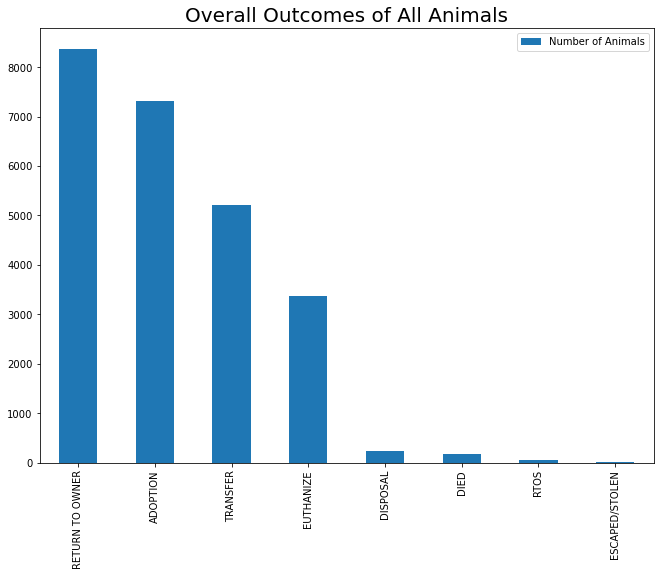

In [59]:
outcome_pie = outcome_counts.plot(kind="bar", figsize=(11,8))
plt.title("Overall Outcomes of All Animals",fontsize=20)

Text(0.5, 1.0, 'Outcome Type for Dogs')

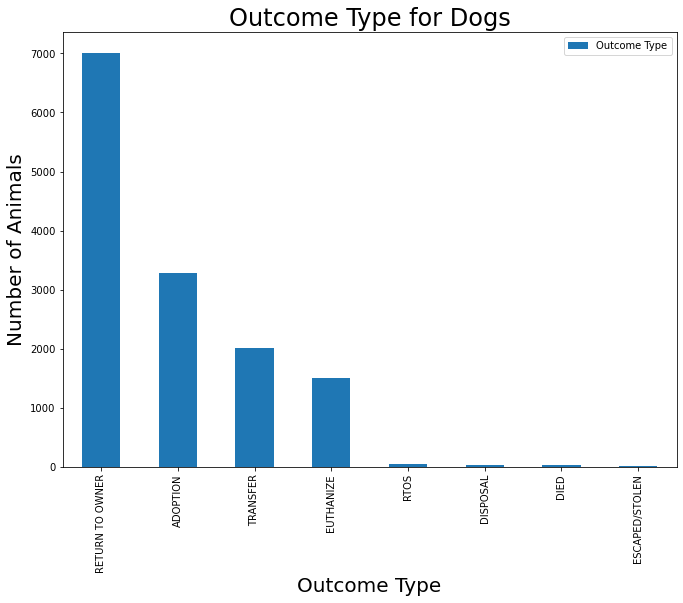

In [60]:
outcome_counts_dogs = pd.DataFrame(SCAS_dogs["Outcome Type"].value_counts())
dog_outcomes_plt = outcome_counts_dogs.plot(kind="bar", figsize=(11,8))
dog_outcomes_plt.set_xlabel("Outcome Type", fontsize=20)
dog_outcomes_plt.set_ylabel("Number of Animals",fontsize=20)

plt.title("Outcome Type for Dogs", fontsize=24)

Text(0.5, 1.0, 'Outcome Type for Cats')

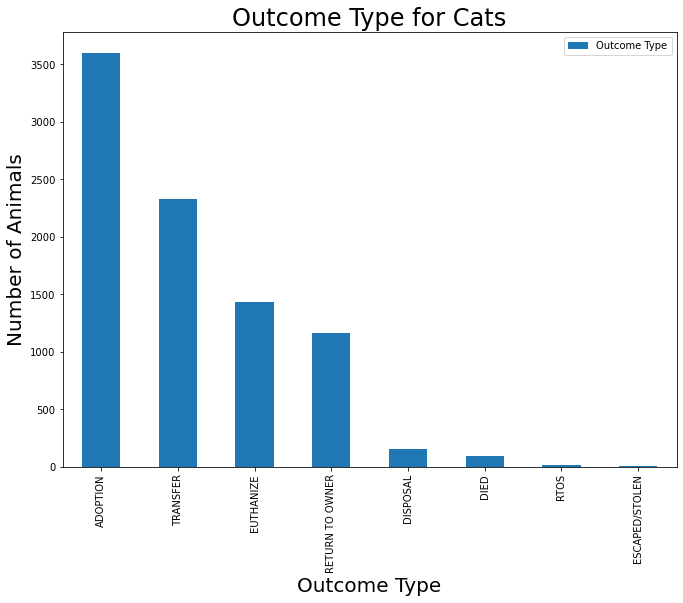

In [61]:
outcome_counts_cats = pd.DataFrame(SCAS_cats["Outcome Type"].value_counts())
cat_outcomes_plt = outcome_counts_cats.plot(kind="bar", figsize=(11,8))
cat_outcomes_plt.set_xlabel("Outcome Type", fontsize=20)
cat_outcomes_plt.set_ylabel("Number of Animals",fontsize=20)

plt.title("Outcome Type for Cats", fontsize=24)

### Adopted Animals by Breed/Kind

Of all the animals that were adopted, which breeds or kinds of animals were more popular for adoption?

In [62]:
adoptedDogs = SCAS_dogs.loc[SCAS_dogs["Outcome Type"] == "ADOPTION"]
adoptedDogs_breeds = adoptedDogs["Breed"].value_counts()
adoptedDogs_breeds.head(20)

CHIHUAHUA SH           383
PIT BULL               328
PIT BULL/MIX           199
CHIHUAHUA SH/MIX       184
GERM SHEPHERD          173
GERM SHEPHERD/MIX      102
SIBERIAN HUSKY          92
LABRADOR RETR/MIX       86
PARSON RUSS TER/MIX     77
BORDER COLLIE/MIX       46
CAIRN TERRIER/MIX       41
LABRADOR RETR           37
POODLE MIN              30
POODLE MIN/MIX          27
DACHSHUND/MIX           27
AUST CATTLE DOG/MIX     26
PARSON RUSS TER         26
CHIHUAHUA LH            23
YORKSHIRE TERR/MIX      22
POMERANIAN/MIX          22
Name: Breed, dtype: int64

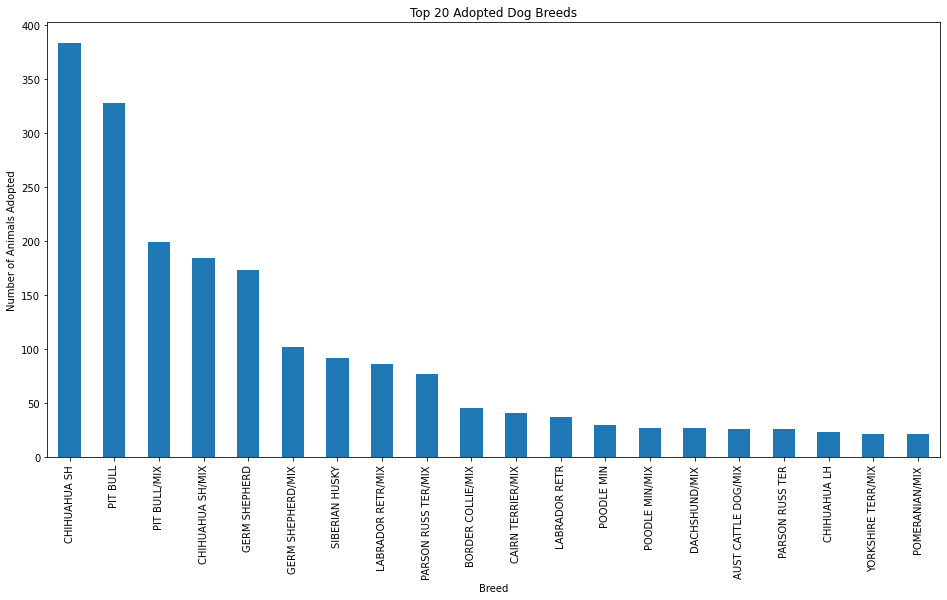

<Figure size 432x288 with 0 Axes>

In [63]:
TopAdopted_Dogs = adoptedDogs_breeds.head(20).plot(kind="bar",figsize=(16,8))
TopAdopted_Dogs.set_xlabel("Breed")
TopAdopted_Dogs.set_ylabel("Number of Animals Adopted")
plt.title("Top 20 Adopted Dog Breeds")
plt.show()
plt.tight_layout()

In [64]:
# and now for cats
adoptedCats = SCAS_cats.loc[SCAS_cats["Outcome Type"] == "ADOPTION"]
adoptedCats_breeds = adoptedCats["Breed"].value_counts()
adoptedCats_breeds.head(20)

DOMESTIC SH               2785
DOMESTIC MH                350
DOMESTIC LH                234
SIAMESE/MIX                 88
SIAMESE                     70
HIMALAYAN/MIX                7
HIMALAYAN                    7
MANX                         6
SNOWSHOE/MIX                 5
ABYSSINIAN/MIX               4
SNOWSHOE                     4
DOMESTIC LH/MAINE COON       3
PERSIAN                      3
MANX/MIX                     3
SCOTTISH FOLD/MIX            3
DOMESTIC SH/MIX              3
TURKISH ANGORA               2
PERSIAN/MIX                  2
DOMESTIC SH/ABYSSINIAN       2
DOMESTIC LH/SIAMESE          2
Name: Breed, dtype: int64

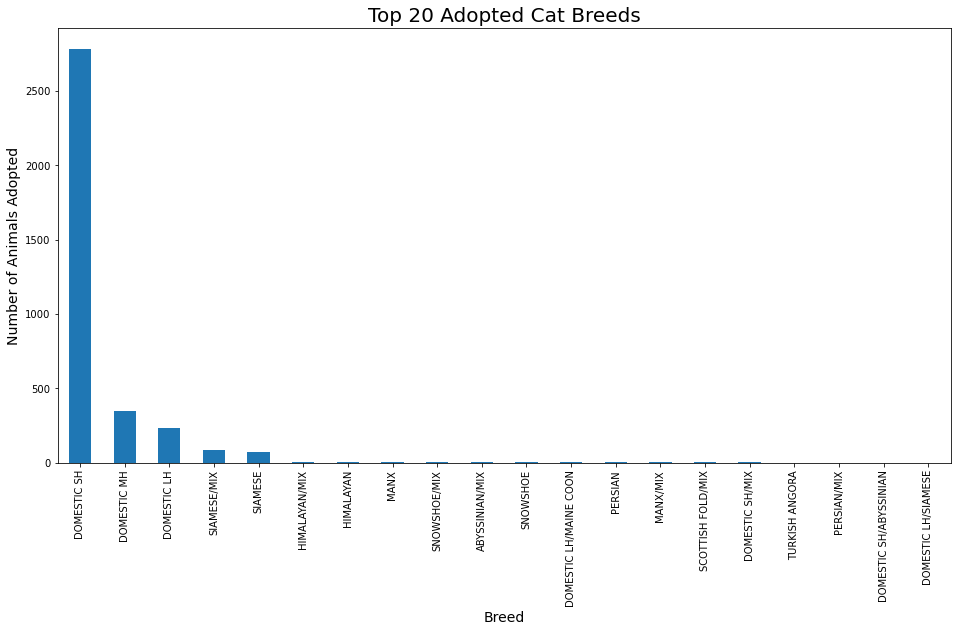

<Figure size 432x288 with 0 Axes>

In [65]:
TopAdopted_Cats = adoptedCats_breeds.head(20).plot(kind="bar",figsize=(16,8))
TopAdopted_Cats.set_xlabel("Breed",fontsize=14)
TopAdopted_Cats.set_ylabel("Number of Animals Adopted",fontsize=14)
plt.title("Top 20 Adopted Cat Breeds",fontsize=20)
plt.show()
plt.tight_layout()

In [66]:
adoptedOther = SCAS_other.loc[SCAS_other["Outcome Type"] == "ADOPTION"]
adoptedOther_breeds = adoptedOther["Breed"].value_counts()
adoptedOther_breeds.head(20)

RABBIT SH           68
CHICKEN             61
GUINEA PIG          46
PARAKEET            27
PIG                 19
COCKATIEL           15
PEAFOWL             14
GOOSE               13
RAT                 13
GOAT                11
SHEEP                9
KOI                  8
LOP-MINI             8
HAMSTER              6
FINCH                5
GOAT/LA MANCHA       5
HAVANA/MIX           5
ENGLISH SPOT/MIX     4
DUTCH/MIX            4
LOP-HOLLAND          4
Name: Breed, dtype: int64

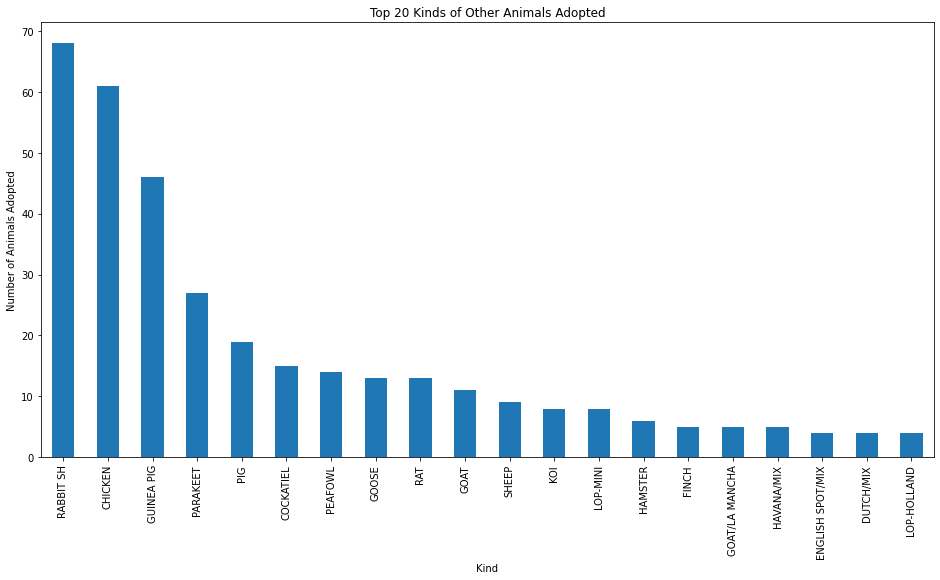

<Figure size 432x288 with 0 Axes>

In [67]:
TopAdopted_Other = adoptedOther_breeds.head(20).plot(kind="bar",figsize=(16,8))
TopAdopted_Other.set_xlabel("Kind")
TopAdopted_Other.set_ylabel("Number of Animals Adopted")
plt.title("Top 20 Kinds of Other Animals Adopted")
plt.show()
plt.tight_layout()

# Animal Intake Over Time

Do certain months of the year bring in more animals than usual?

In [68]:
# Range for dataset
print(SCAS_data["Intake Date"].min())
print(SCAS_data["Intake Date"].max())

2013-08-16 00:00:00
2023-04-11 00:00:00


In [69]:
#OK I'm stuck RIP.
SCAS_dates = SCAS_data[["Name", "Type", "Breed", "Animal ID", "Intake Date", "Outcome Date"]]
SCAS_dates

,Name,Type,Breed,Animal ID,Intake Date,Outcome Date
0,RAZOR,DOG,BOSTON TERRIER,A396382,2022-12-26,2022-12-26
1,NaN,OTHER,PIGEON,A416206,2023-03-15,2023-03-15
2,MAX,DOG,BORDER COLLIE,A399488,2023-03-15,2023-03-15
3,NaN,CAT,DOMESTIC LH,A414520,2022-12-23,2022-12-27
4,PUDGY,DOG,CHIHUAHUA SH/SCHIPPERKE,A415428,2023-02-08,2023-03-15
...,...,...,...,...,...,...
24890,BUBA,CAT,DOMESTIC SH,A392014,2019-10-03,2019-10-23
24891,*JESSICA,OTHER,AMERICAN,A374156,2018-06-20,2018-10-10
24892,SHINER,DOG,PIT BULL,A293651,2014-09-11,2014-10-02
24893,*NEWTON,DOG,CHIHUAHUA SH/MIX,A398415,2020-07-02,2020-08-20


In [70]:
SCAS_dates["Intake Date"].value_counts().sort_index()

2013-08-16     1
2013-08-17     1
2013-08-22     1
2013-08-24     1
2013-08-31     1
              ..
2023-04-07     4
2023-04-08    15
2023-04-09     2
2023-04-10     3
2023-04-11     7
Name: Intake Date, Length: 3222, dtype: int64

In [71]:
SCAS_dates_2022 = SCAS_dates.loc[SCAS_dates["Intake Date"].between("2022-01-01", "2022-12-31")].sort_values(by=["Intake Date"])
SCAS_dates_2022

,Name,Type,Breed,Animal ID,Intake Date,Outcome Date
20956,TIGER,DOG,CHINESE SHARPEI/PIT BULL,A408650,2022-01-01,2022-02-18
8508,CHUY,DOG,PIT BULL,A339772,2022-01-01,2022-01-08
11136,*FLORENCE,DOG,ANATOL SHEPHERD,A406222,2022-01-01,2022-02-03
4753,GINGER,DOG,MALTESE/POODLE TOY,A408652,2022-01-01,2022-01-06
10461,MISSY,DOG,PIT BULL,A299986,2022-01-02,2022-01-26
...,...,...,...,...,...,...
99,*SPRECKLES,CAT,DOMESTIC SH,A413977,2022-12-31,2023-01-04
545,*APOLLO,DOG,AMER BULLDOG/MIX,A414662,2022-12-31,NaT
65,CHIQUIO,DOG,GERM SHEPHERD,A307882,2022-12-31,2022-12-31
196,NaN,DOG,CHIHUAHUA SH/MIX,A414663,2022-12-31,2023-01-11


In [72]:
SCAS_dates_2014 = SCAS_dates.loc[SCAS_dates["Intake Date"].between("2014-01-01", "2014-12-31")].sort_values(by=["Intake Date"])
SCAS_dates_2015 = SCAS_dates.loc[SCAS_dates["Intake Date"].between("2015-01-01", "2015-12-31")].sort_values(by=["Intake Date"])
SCAS_dates_2016 = SCAS_dates.loc[SCAS_dates["Intake Date"].between("2016-01-01", "2016-12-31")].sort_values(by=["Intake Date"])
SCAS_dates_2017 = SCAS_dates.loc[SCAS_dates["Intake Date"].between("2017-01-01", "2017-12-31")].sort_values(by=["Intake Date"])
SCAS_dates_2018 = SCAS_dates.loc[SCAS_dates["Intake Date"].between("2018-01-01", "2018-12-31")].sort_values(by=["Intake Date"])
SCAS_dates_2019 = SCAS_dates.loc[SCAS_dates["Intake Date"].between("2019-01-01", "2019-12-31")].sort_values(by=["Intake Date"])
SCAS_dates_2020 = SCAS_dates.loc[SCAS_dates["Intake Date"].between("2020-01-01", "2020-12-31")].sort_values(by=["Intake Date"])
SCAS_dates_2021 = SCAS_dates.loc[SCAS_dates["Intake Date"].between("2021-01-01", "2021-12-31")].sort_values(by=["Intake Date"])

In [73]:
SCAS_2014_total = SCAS_dates_2014["Animal ID"].count()
SCAS_2014_total

3216

In [76]:
SCAS_months = SCAS_dates.copy()
SCAS_months["Month"] = pd.DatetimeIndex(SCAS_months["Intake Date"]).month
SCAS_months

,Name,Type,Breed,Animal ID,Intake Date,Outcome Date,Month
0,RAZOR,DOG,BOSTON TERRIER,A396382,2022-12-26,2022-12-26,12
1,NaN,OTHER,PIGEON,A416206,2023-03-15,2023-03-15,3
2,MAX,DOG,BORDER COLLIE,A399488,2023-03-15,2023-03-15,3
3,NaN,CAT,DOMESTIC LH,A414520,2022-12-23,2022-12-27,12
4,PUDGY,DOG,CHIHUAHUA SH/SCHIPPERKE,A415428,2023-02-08,2023-03-15,2
...,...,...,...,...,...,...,...
24890,BUBA,CAT,DOMESTIC SH,A392014,2019-10-03,2019-10-23,10
24891,*JESSICA,OTHER,AMERICAN,A374156,2018-06-20,2018-10-10,6
24892,SHINER,DOG,PIT BULL,A293651,2014-09-11,2014-10-02,9
24893,*NEWTON,DOG,CHIHUAHUA SH/MIX,A398415,2020-07-02,2020-08-20,7


In [81]:
SCAS_months.sort_values(by="Month")

,Name,Type,Breed,Animal ID,Intake Date,Outcome Date,Month
7521,NaN,DOG,GERM SHEPHERD,A409116,2022-01-24,2022-01-24,1
17914,LUCY,DOG,LABRADOR RETR,A347848,2017-01-30,2017-01-31,1
16387,*TWIGGY,DOG,CHIHUAHUA SH,A347129,2017-01-13,2017-02-07,1
2251,CHOPPERS,CAT,DOMESTIC SH,A402019,2021-01-09,2021-03-10,1
24325,PANTERA,DOG,AUST KELPIE/MIX,A347833,2017-01-28,2017-02-24,1
...,...,...,...,...,...,...,...
9817,BETTY,CAT,DOMESTIC SH,A346218,2016-12-13,2016-12-14,12
9814,PRECIOUS,DOG,LHASA APSO/MIX,A346764,2016-12-27,2016-12-27,12
9775,NaN,CAT,DOMESTIC SH,A345785,2016-12-01,2016-12-06,12
9737,VANILLA BEAN,DOG,CHIHUAHUA SH,A401715,2020-12-09,2021-01-08,12


In [84]:
SCAS_mon_year = SCAS_dates.copy()
SCAS_mon_year["Month-Year"] = pd.to_datetime(SCAS_mon_year["Intake Date"]).dt.to_period('M')
SCAS_mon_year.sort_values(by="Month-Year")

,Name,Type,Breed,Animal ID,Intake Date,Outcome Date,Month-Year
2946,ZIGGY,CAT,DOMESTIC SH,A295782,2013-08-17,2014-01-07,2013-08
22145,NALA,CAT,DOMESTIC SH,A296108,2013-08-24,2014-03-01,2013-08
11881,ATHENA,OTHER,RABBIT SH,A295655,2013-08-16,2014-01-04,2013-08
1878,*ALICE,DOG,PIT BULL,A296009,2013-08-22,2014-04-14,2013-08
23435,KHLOE,DOG,PIT BULL,A294143,2013-08-31,2014-04-14,2013-08
...,...,...,...,...,...,...,...
563,NaN,DOG,ALASKAN HUSKY,A416612,2023-04-08,NaT,2023-04
564,NaN,CAT,DOMESTIC MH,A416613,2023-04-08,NaT,2023-04
359,NaN,OTHER,RABBIT LH,A416467,2023-04-01,NaT,2023-04
401,VENOM,DOG,GERM SHEPHERD/MIX,A416476,2023-04-01,2023-04-04,2023-04


In [87]:
SCAS_monthly_totals = SCAS_mon_year.groupby("Month-Year")["Animal ID"].count()
SCAS_monthly_totals

Month-Year
2013-08      5
2013-09      1
2013-10      5
2013-11      6
2013-12    103
          ... 
2022-12    158
2023-01    177
2023-02    138
2023-03    190
2023-04     85
Freq: M, Name: Animal ID, Length: 117, dtype: int64

Text(0.5, 0, 'Month-Year')

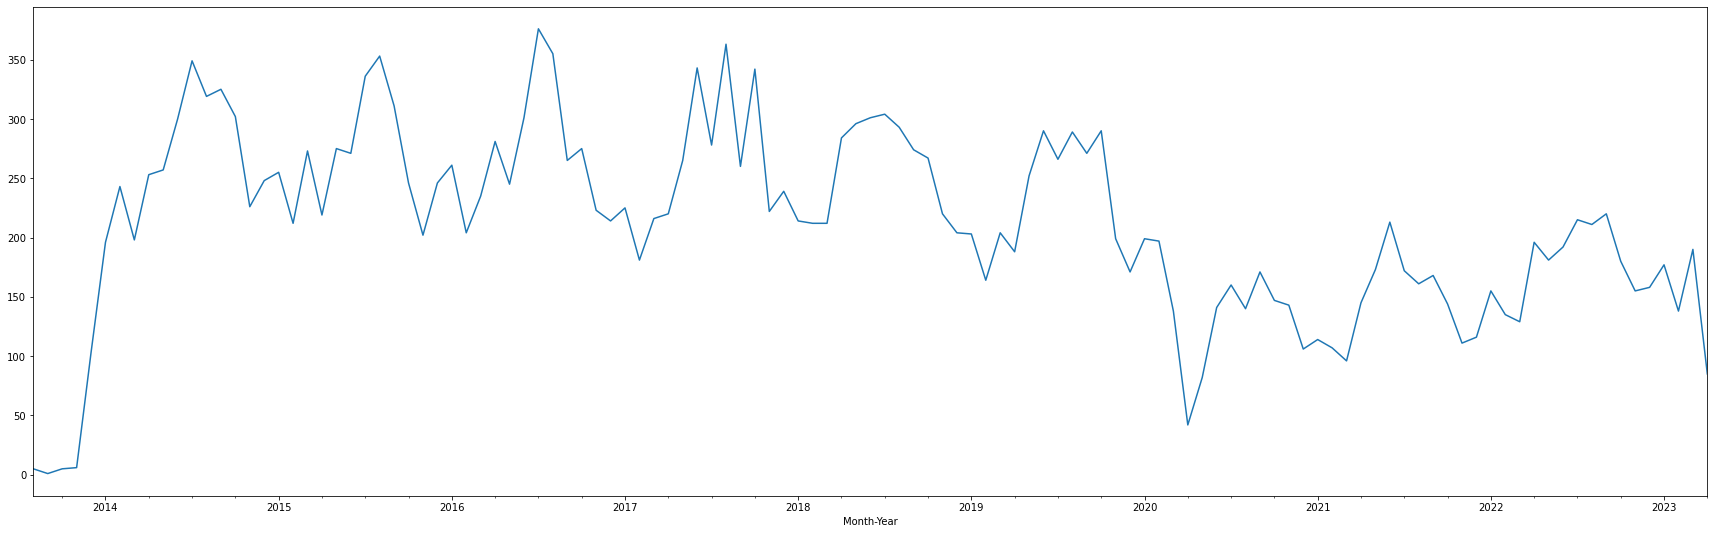

In [103]:
SCAS_monthly_totals.plot(x="Month-Year",kind="line",figsize=(30,9))
plt.xlabel("Month-Year")

In [126]:
SCAS_dates_2014["Month"] = pd.DatetimeIndex(SCAS_dates_2014["Intake Date"]).month
Intakes_2014 = SCAS_dates_2014.groupby("Month")["Animal ID"].count()

Text(0.5, 0, 'Month')

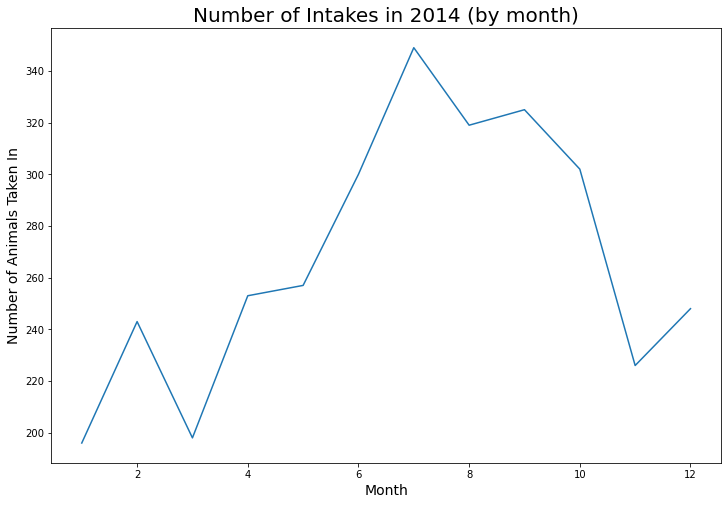

In [127]:
Intakes_2014.plot(kind="line",figsize=(12,8))
plt.title("Number of Intakes in 2014 (by month)",fontsize=20)
plt.ylabel("Number of Animals Taken In", fontsize=14)
plt.xlabel("Month", fontsize=14)

In [128]:
SCAS_dates_2015["Month"] = pd.DatetimeIndex(SCAS_dates_2015["Intake Date"]).month
SCAS_dates_2016["Month"] = pd.DatetimeIndex(SCAS_dates_2016["Intake Date"]).month
SCAS_dates_2017["Month"] = pd.DatetimeIndex(SCAS_dates_2017["Intake Date"]).month
SCAS_dates_2018["Month"] = pd.DatetimeIndex(SCAS_dates_2018["Intake Date"]).month
SCAS_dates_2019["Month"] = pd.DatetimeIndex(SCAS_dates_2019["Intake Date"]).month
SCAS_dates_2020["Month"] = pd.DatetimeIndex(SCAS_dates_2020["Intake Date"]).month
SCAS_dates_2021["Month"] = pd.DatetimeIndex(SCAS_dates_2021["Intake Date"]).month
SCAS_dates_2022["Month"] = pd.DatetimeIndex(SCAS_dates_2022["Intake Date"]).month
SCAS_dates_2015

,Name,Type,Breed,Animal ID,Intake Date,Outcome Date,Month
22545,NaN,DOG,LABRADOR RETR/MIX,A315407,2015-01-01,2015-01-02,1
17108,NEEMO,DOG,BORDER COLLIE,A315106,2015-01-02,2015-01-03,1
1982,GOOFY,DOG,GERM SHEPHERD,A215651,2015-01-02,2015-01-03,1
10527,HEIDI,DOG,LHASA APSO,A233128,2015-01-02,2015-01-13,1
14422,SMOKY,DOG,QUEENSLAND HEEL/MIX,A224390,2015-01-02,2015-01-03,1
...,...,...,...,...,...,...,...
3864,MR JONES,DOG,POODLE MIN/MIX,A329906,2015-12-31,2016-01-12,12
18898,KODA,DOG,AUST SHEPHERD/MIX,A331486,2015-12-31,2016-01-02,12
13544,MARLEY,DOG,LABRADOR RETR/PIT BULL,A331479,2015-12-31,2015-12-31,12
2789,NaN,CAT,DOMESTIC SH,A331488,2015-12-31,2015-12-31,12


In [132]:
Intakes_2015 = SCAS_dates_2015.groupby("Month")["Animal ID"].count()
Intakes_2016 = SCAS_dates_2016.groupby("Month")["Animal ID"].count()
Intakes_2017 = SCAS_dates_2017.groupby("Month")["Animal ID"].count()
Intakes_2018 = SCAS_dates_2018.groupby("Month")["Animal ID"].count()
Intakes_2019 = SCAS_dates_2019.groupby("Month")["Animal ID"].count()
Intakes_2020 = SCAS_dates_2020.groupby("Month")["Animal ID"].count()
Intakes_2021 = SCAS_dates_2021.groupby("Month")["Animal ID"].count()
Intakes_2022 = SCAS_dates_2022.groupby("Month")["Animal ID"].count()
Intakes_2015

Month
1     255
2     212
3     273
4     219
5     275
6     271
7     336
8     353
9     311
10    246
11    202
12    246
Name: Animal ID, dtype: int64

In [131]:
# Preparing to make a multi-line plot to compare across all the whole years in the dataset on which months experience the most animal intakes\
months = Intakes_2015.keys()


Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Month')

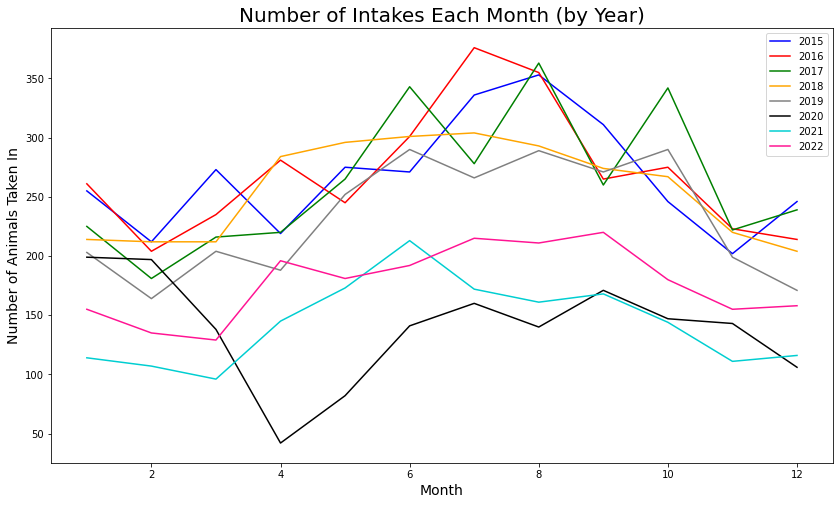

In [175]:
plt.figure(figsize=(14,8))

Trend_2015, = plt.plot(months, Intakes_2015, color="blue", label="2015")
Trend_2016, = plt.plot(months, Intakes_2016, color="red", label="2016")
Trend_2017, = plt.plot(months, Intakes_2017, color="green", label="2017")
Trend_2018, = plt.plot(months, Intakes_2018, color="orange", label="2018")
Trend_2019, = plt.plot(months, Intakes_2019, color="gray", label="2019")
Trend_2020, = plt.plot(months, Intakes_2020, color ="black", label="2020")
Trend_2021, = plt.plot(months, Intakes_2021, color ="darkturquoise", label="2021")
Trend_2022, = plt.plot(months, Intakes_2022, color ="deeppink", label="2022")

plt.title("Number of Intakes Each Month (by Year)", fontsize=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of Animals Taken In", fontsize=14)
plt.legend(loc="best")
plt.show()